In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
clean_path = "../data/retail_store_inventory_clean.csv"
df = pd.read_csv(clean_path, parse_dates=["Date"])

In [3]:
forecast_path = "../data/forecast_prophet.csv"
forecast = pd.read_csv(forecast_path, parse_dates=["Date"])

In [4]:
df = df.merge(
    forecast, 
    on=["Date", "Store ID", "Product ID"], 
    how="left"
)

In [5]:
df["Ending Inventory"] = df["Inventory Level"] - df["Units Sold"]

In [6]:
df["Forecast Ending Inventory"] = df["Inventory Level"] - df["Forecast"]

In [7]:
df["Stockout"] = df["Ending Inventory"] < 0
df["Overstock"] = df["Ending Inventory"] > (df["Units Sold"].mean() * 2)

In [8]:
kpi_product = df.groupby(["Store ID", "Product ID"]).agg({
    "Stockout": "mean",         
    "Overstock": "mean",        
    "Units Sold": "sum",        
    "Forecast": "sum",          
    "Ending Inventory": "mean"  
}).reset_index()

kpi_product.rename(columns={
    "Stockout": "Stockout Rate",
    "Overstock": "Overstock Rate",
    "Units Sold": "Total Sales",
    "Forecast": "Total Forecast",
    "Ending Inventory": "Avg Inventory"
}, inplace=True)

In [9]:
kpi_category = df.groupby(["Category"]).agg({
    "Stockout": "mean",
    "Overstock": "mean",
    "Units Sold": "sum",
    "Forecast": "sum",
    "Ending Inventory": "mean"
}).reset_index()

kpi_category.rename(columns={
    "Stockout": "Stockout Rate",
    "Overstock": "Overstock Rate",
    "Units Sold": "Total Sales",
    "Forecast": "Total Forecast",
    "Ending Inventory": "Avg Inventory"
}, inplace=True)

In [10]:
kpi_region = df.groupby(["Region"]).agg({
    "Stockout": "mean",
    "Overstock": "mean",
    "Units Sold": "sum",
    "Forecast": "sum",
    "Ending Inventory": "mean"
}).reset_index()

kpi_region.rename(columns={
    "Stockout": "Stockout Rate",
    "Overstock": "Overstock Rate",
    "Units Sold": "Total Sales",
    "Forecast": "Total Forecast",
    "Ending Inventory": "Avg Inventory"
}, inplace=True)

In [11]:
df.to_csv("../data/inventory_simulation.csv", index=False)
kpi_product.to_csv("../data/inventory_kpi_product.csv", index=False)
kpi_category.to_csv("../data/inventory_kpi_category.csv", index=False)
kpi_region.to_csv("../data/inventory_kpi_region.csv", index=False)

print("✅ Inventory simulation saved to ../data/inventory_simulation.csv")
print("✅ KPI per Product saved to ../data/inventory_kpi_product.csv")
print("✅ KPI per Category saved to ../data/inventory_kpi_category.csv")
print("✅ KPI per Region saved to ../data/inventory_kpi_region.csv")

✅ Inventory simulation saved to ../data/inventory_simulation.csv
✅ KPI per Product saved to ../data/inventory_kpi_product.csv
✅ KPI per Category saved to ../data/inventory_kpi_category.csv
✅ KPI per Region saved to ../data/inventory_kpi_region.csv


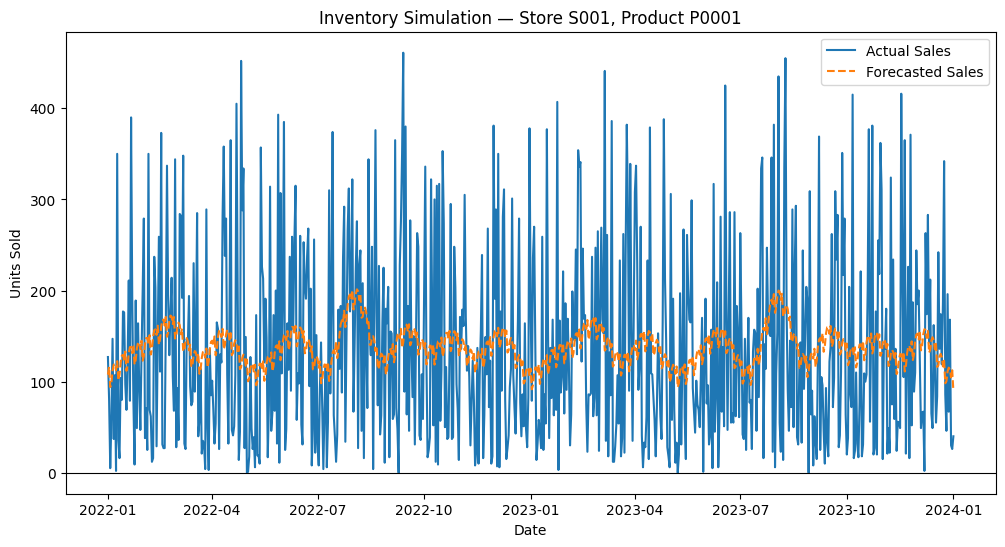

In [12]:
plt.figure(figsize=(12, 6))
sample = df[(df["Store ID"] == df["Store ID"].iloc[0]) & 
            (df["Product ID"] == df["Product ID"].iloc[0])]

plt.plot(sample["Date"], sample["Units Sold"], label="Actual Sales")
plt.plot(sample["Date"], sample["Forecast"], label="Forecasted Sales", linestyle="dashed")
plt.axhline(0, color="black", linewidth=0.8)

plt.title(f"Inventory Simulation — Store {sample['Store ID'].iloc[0]}, Product {sample['Product ID'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()